In [1]:
import numpy as np
import pandas as pd
from scipy import integrate, optimize, stats, signal
import matplotlib.pyplot as plt

 - https://www.wolframalpha.com/input?i=diff%5Br*C%5Ep%281-%28C%2FK%29%5Ea%29%2C+r%5D
 - https://www.wolframalpha.com/input?i=diff%5Br*C%5Ep%281-%28C%2FK%29%5Ea%29%2C+p%5D
 - https://www.wolframalpha.com/input?i=diff%5Br*C%5Ep%281-%28C%2FK%29%5Ea%29%2C+K%5D
 - https://www.wolframalpha.com/input?i=diff%5Br*C%5Ep%281-%28C%2FK%29%5Ea%29%2C+a%5D
 - https://www.wolframalpha.com/input?i=C%27%28t%29+%3D+r*C%5Ep%281-%28C%28t%29%2FK%29%5Ea%29

In [2]:
def GRM_ODE(t, C, r, p, K, a):
    return r*(np.power(C, p))*(1-np.power(((C)/(K)), a))

In [3]:
def GRM(t, C0, r, p, K, a, rtol=1e-6):
    return integrate.solve_ivp(GRM_ODE, (t[0], t[-1]), [C0], t_eval=t, args=(r, p, K, a), rtol=rtol).y[0]

In [4]:
t = np.linspace(0, 100, 250)

In [5]:
params = {
    "T0": [2e4, 2.5 , 0.75 ,1.2e6, 2.2],
    "T0/r-": [2e4, 1.5 , 0.75 ,1.2e6, 2.2],
    "T0/r+": [2e4, 3.5 , 0.75 ,1.2e6, 2.2],
    "T0/a-": [2e4, 2.5 , 0.75 ,1.2e6, 1.0],
    "T0/a+": [2e4, 2.5 , 0.75 ,1.2e6, 10.0],
    "T0/p-": [2e4, 2.5 , 0.70 ,1.2e6, 2.2],
    "T0/p+": [2e4, 2.5 , 0.80 ,1.2e6, 2.2],
    "T0/C+": [8e5, 2.5 , 0.75 ,1.2e6, 2.2],
    "T0/K-": [2e4, 2.5 , 0.75 ,5.0e5, 2.2],
}

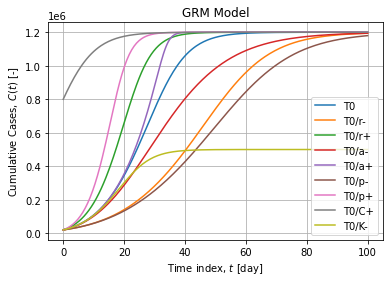

In [6]:
fig, axe = plt.subplots()
for k, v in params.items():
    y = GRM(t, *v)
    axe.plot(t, y, label=k)
axe.legend(loc="lower right")
axe.set_title("GRM Model")
axe.set_xlabel(r"Time index, $t$ [day]")
axe.set_ylabel(r"Cumulative Cases, $C(t)$ [-]")
axe.grid()

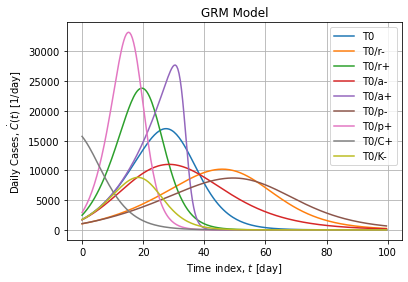

In [8]:
fig, axe = plt.subplots()
for k, v in params.items():
    y = GRM(t, *v)
    axe.plot(t[:-1], np.diff(y), label=k)
axe.legend()
axe.set_title("GRM Model")
axe.set_xlabel(r"Time index, $t$ [day]")
axe.set_ylabel(r"Daily Cases, $\dot{C}(t)$ [1/day]")
axe.grid()